# Refresher: Support Vector Machines

### Bernard Evans

#### How can we use some data to know some things...


Import Import Import... Import Import Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the Dataset

As always, we start by looking at the dataset.

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Looking at the size of the dataset
[rows, columns] = df.shape
print("Rows: ", rows, ", Columns:", columns)

Rows:  284807 , Columns: 31


### 2. Analyse and visualise the data
So if this is apparently some cluster-friendly data... we are doing classification.

In [4]:
## Lets get some idea of the basic distributions of the 
## different features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


If this is 'clusterable' data, you would expect that we would see some bimodalish distributions.

array([[<Axes: title={'center': 'V1'}>]], dtype=object)

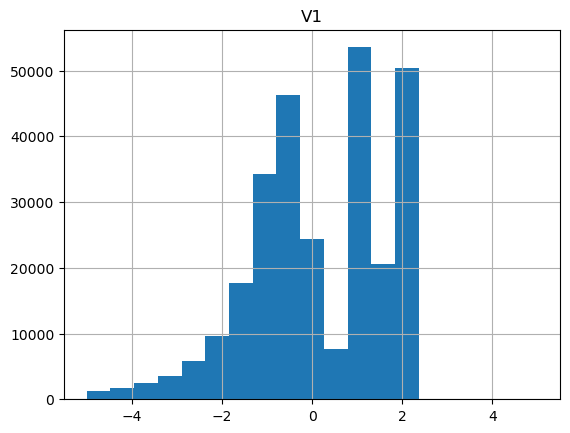

In [5]:
# Plot a histogram

my_bins = np.linspace(-5, 5, 20)

df.loc[:, ["V1"]].hist(bins=my_bins)

So there does look to be some level of multi-modality in V1.

array([[<Axes: title={'center': 'V2'}>]], dtype=object)

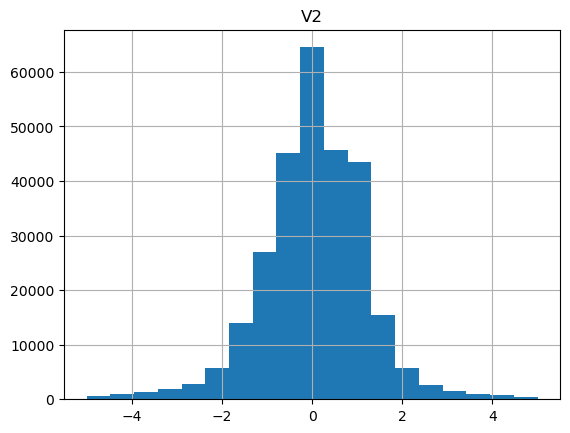

In [6]:
# Plot a histogram

my_bins = np.linspace(-5, 5, 20)

df.loc[:, ["V2"]].hist(bins=my_bins)

This is less helpful. V2 looks pretty normally distributed. Even if there is some 'bimodality' here it is probably so small as to not be very useful.

array([[<Axes: title={'center': 'V11'}>]], dtype=object)

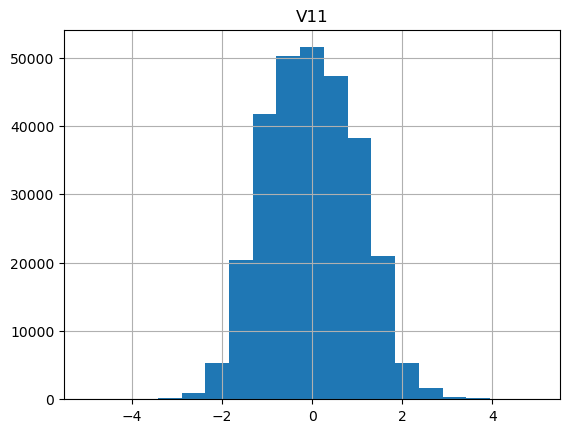

In [7]:
# Plot a histogram

my_bins = np.linspace(-5, 5, 20)

df.loc[:, ["V11"]].hist(bins=my_bins)

V11? Again not so useful.

array([[<Axes: title={'center': 'V12'}>]], dtype=object)

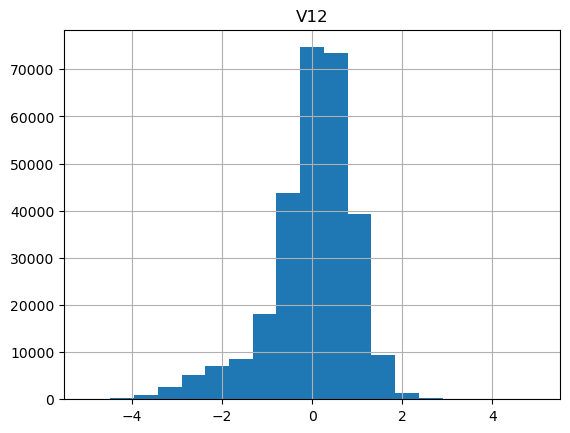

In [8]:
# Plot a histogram

my_bins = np.linspace(-5, 5, 20)

df.loc[:, ["V12"]].hist(bins=my_bins)

Maybe?

array([[<Axes: title={'center': 'V10'}>]], dtype=object)

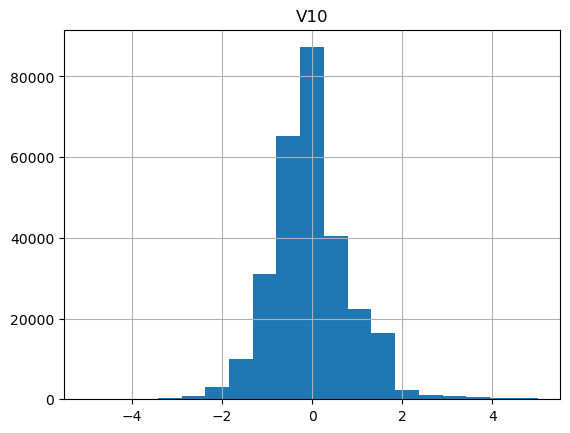

In [9]:
# Plot a histogram

my_bins = np.linspace(-5, 5, 20)

df.loc[:, ["V10"]].hist(bins=my_bins)

Still not looking great.

(-10.0, 10.0)

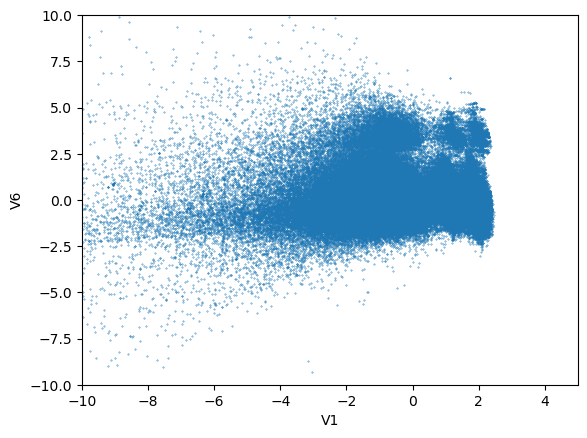

In [10]:
plt.scatter(df.loc[:, ["V1"]], df.loc[:, ["V6"]], s=0.1)
plt.xlabel('V1')
plt.ylabel('V6')
plt.xlim(-10, 5)
plt.ylim(-10, 10)

Hmmm... this is the kind of thing where one might be a bit suspicious. Lets break it out by class to see if we have anything useful. For reference I manually looked through a bunch of these to find data-points that were kind of useful. These include V9, V10, V11, V12, V14, V16, V17, V18, V24 (good for seeing non-blues)

[0 1]


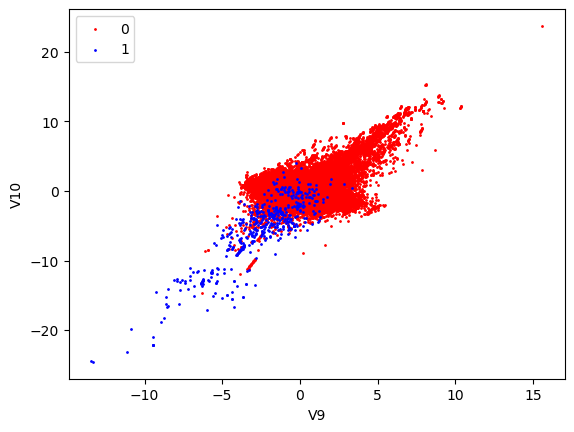

In [11]:
classes = np.unique(df.loc[:, ["Class"]])
print(classes)

colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create a scatter plot
fig, ax = plt.subplots()
for key, group in df.groupby('Class'):
    group.plot(ax=ax, kind='scatter', x='V9', y='V10', label=key, color=colors[key], s=1)

# ax.set_xlim(-30, 5)
# ax.set_ylim(-20, 20)

[0 1]


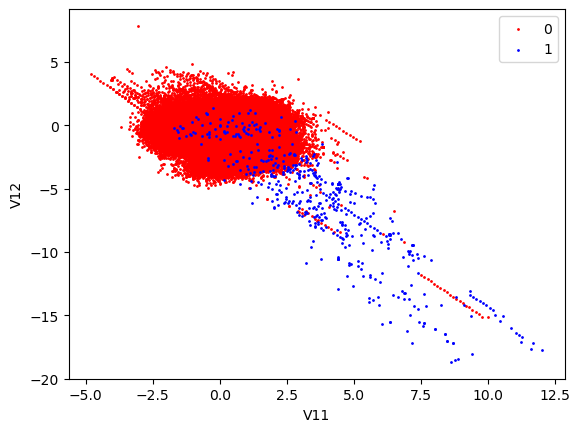

In [12]:
classes = np.unique(df.loc[:, ["Class"]])
print(classes)

colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create a scatter plot
fig, ax = plt.subplots()
for key, group in df.groupby('Class'):
    group.plot(ax=ax, kind='scatter', x='V11', y='V12', label=key, color=colors[key], s=1)

# ax.set_xlim(-30, 5)
# ax.set_ylim(-20, 20)

[0 1]


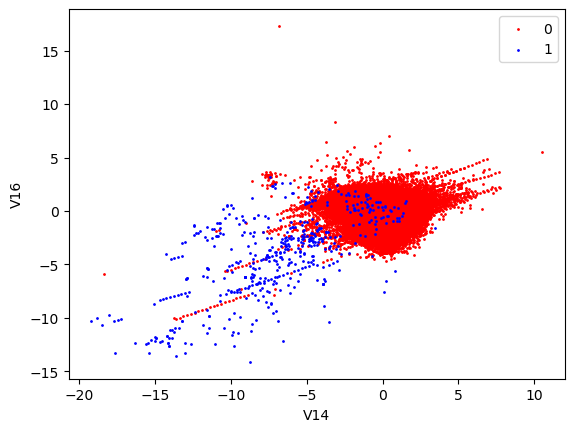

In [13]:
classes = np.unique(df.loc[:, ["Class"]])
print(classes)

colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create a scatter plot
fig, ax = plt.subplots()
for key, group in df.groupby('Class'):
    group.plot(ax=ax, kind='scatter', x='V14', y='V16', label=key, color=colors[key], s=1)

# Lets do SVM



In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data into a DataFrame

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2)

# Train an SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9986131104947158


Wooo!!! That is a ridiculously high accuracy. I want to see what is what.

Note, we have used a 'linear' Kernel so clearly this data is pretty 'separable'. On the other hand... 7 minutes?? Wowzers that is slow.

[0 1]


(0.0, 0.25)

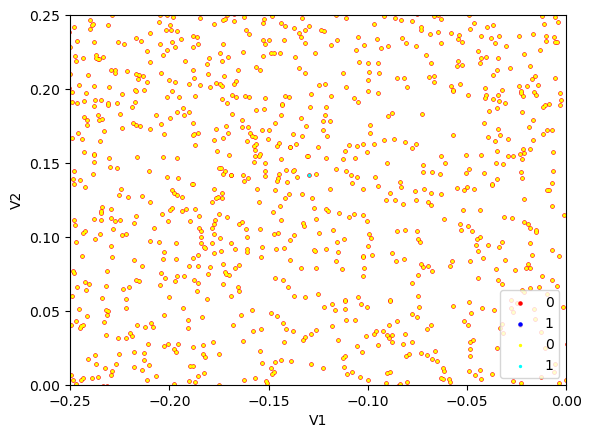

In [15]:
# Predict the whole data set
predict_all = clf.predict(df.drop('Class', axis=1))

df_new = df.copy()
df_new['Predict'] = predict_all
classes = np.unique(df_new.loc[:, ["Class"]])
print(classes)

colors1 = {0: 'yellow', 1: 'cyan', 2: 'green'}
colors2 = {0: 'red', 1: 'blue', 2: 'green'}

df_new.describe()

# Create a scatter plot
fig, ax = plt.subplots()

for key, group in df_new.groupby('Predict'):
    group.plot(ax=ax, kind='scatter', x='V1', y='V2', label=key, color=colors2[key], marker='o', s=5)

for key, group in df_new.groupby('Class'):
    group.plot(ax=ax, kind='scatter', x='V1', y='V2', label=key, color=colors1[key], s=2)

ax.set_xlim(-0.25, 0)
ax.set_ylim(0, 0.25)



Not bad... I especially like all the randomly 'in the wrong spot' yellow dots with nice red borders (correct classifications.)

In [16]:
print(type(predict_all))

df.describe()

<class 'numpy.ndarray'>


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000
